# Data exploration
04.03.2021

In [1]:
import pandas as pd 
from nltk import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus.reader.conll import ConllCorpusReader

Extracting the sentences and the parts of speech

In [2]:
sentences = []
senfinal = []
pos = []
with open('en_ewt-ud-train.conllu', 'r', encoding = "utf-8") as rfile:
    data = rfile.readlines()
    for line in data:
        if line.startswith("# text"):
            sentences.append(line)
    for el in sentences:
        senfinal.append(el.replace("\n", "").replace("# text = ","").rstrip())
    for line in data:
        if line[0].isnumeric():
            pos.append(line.split('\t')[3])

Prepocessing the data by writing a new file without the metadata (lines starting with #)

In [3]:
#writing a new file without the metadata (lines starting with #)    
with open('en_ewt-ud-train.conllu', 'r', encoding = "utf-8") as rfile:
    with open('en_ewt-ud-train_preproc.conllu', 'w', encoding = "utf-8") as wfile:    
        for line in rfile.readlines():
            if line[0] != '#':
                wfile.write(line)

Reading the corpus and only extracting the words and the pos tags

In [4]:
corpus = ConllCorpusReader('./', ['en_ewt-ud-train_preproc.conllu'], 
                           ['ignore', 'words', 'ignore', 'pos', 'ignore', 'ignore', 'ignore', 'ignore', 'ignore', 'ignore'])

## Bar plot with the most frequent 100 words

Extracting the most frequent 100 words from the corpus that are not stopwords

In [5]:
en_stopwords = set(stopwords.words('english'))
freqs = FreqDist(corpus.words())
mostfreqnopct = [(word, freq) for (word, freq) in freqs.most_common() 
                 if word.isalpha() and word.lower() not in en_stopwords][:100]

A function to create bar plots:

In [6]:
def barplot_frequency(tokens, freqs, file_name):
    
    """ 
    Create a bar plot with tokens in the x-axis and their frequency in the 
    y-axis.
    The plot is saved as a pdf in the current directory.
    
    Parameters
    ----------
    tokens : list
        List of tokens.
    freqs : list
        List with frequencies of the corresponding tokens.
    file_name : str
        Name of the file to save the plot.

    Returns
    -------
    None.
    """
    fig = plt.figure(figsize=(25,5))
    
    x = [i for i in range(len(tokens))]
    plt.bar(x, freqs, tick_label=tokens, align='center', color='olivedrab')
    plt.xticks(rotation='45')
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.title('Most frequent words in the corpus')
    plt.savefig(file_name)
    plt.show()

Plotting the 100 most common words

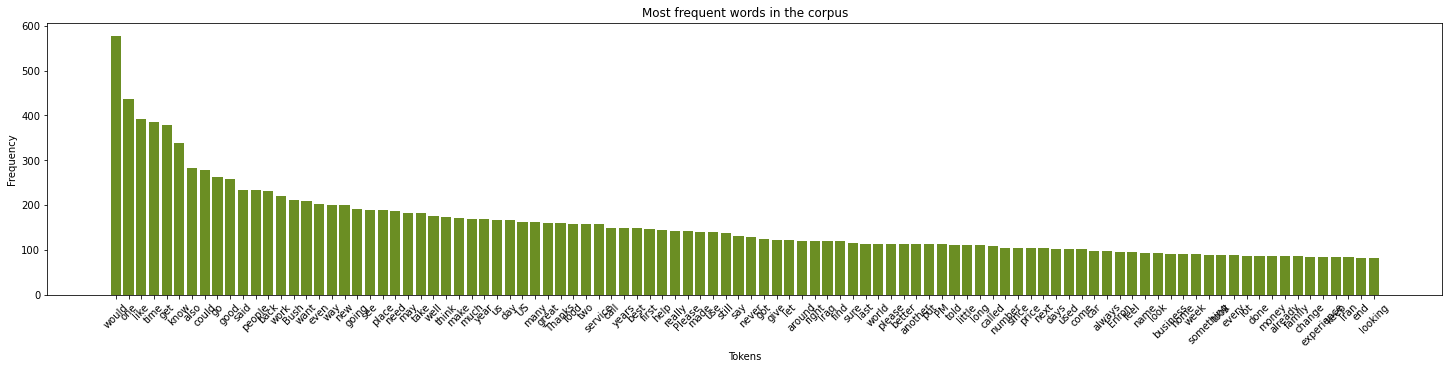

In [7]:
x = [w for (w, f) in mostfreqnopct]
y = [f for (w, f) in mostfreqnopct]
barplot_frequency(x, y, 'word_freq.pdf')

## Word Cloud with words appearing less than 10 times

Extracting words that appear less than 10 times

In [22]:
rare_words = [word for word, freq in freqs.items() if freq <= 10]

A function to create word clouds.

In [9]:
def plot_cloud(wordcloud, file_name):
    
    """ 
    Creates a wordcloud.
    The plot is saved as a pdf in the current working directory.
    
    Parameters
    ----------
    worcloud : string
        A unique string with the tokens.
    file_name : str
        Name of the file to save the plot.
    Returns
    -------
    None.
    """
    # Set figure size
    plt.figure(figsize=(80, 80))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    plt.savefig(file_name)
    plt.show()

Generating a word cloud

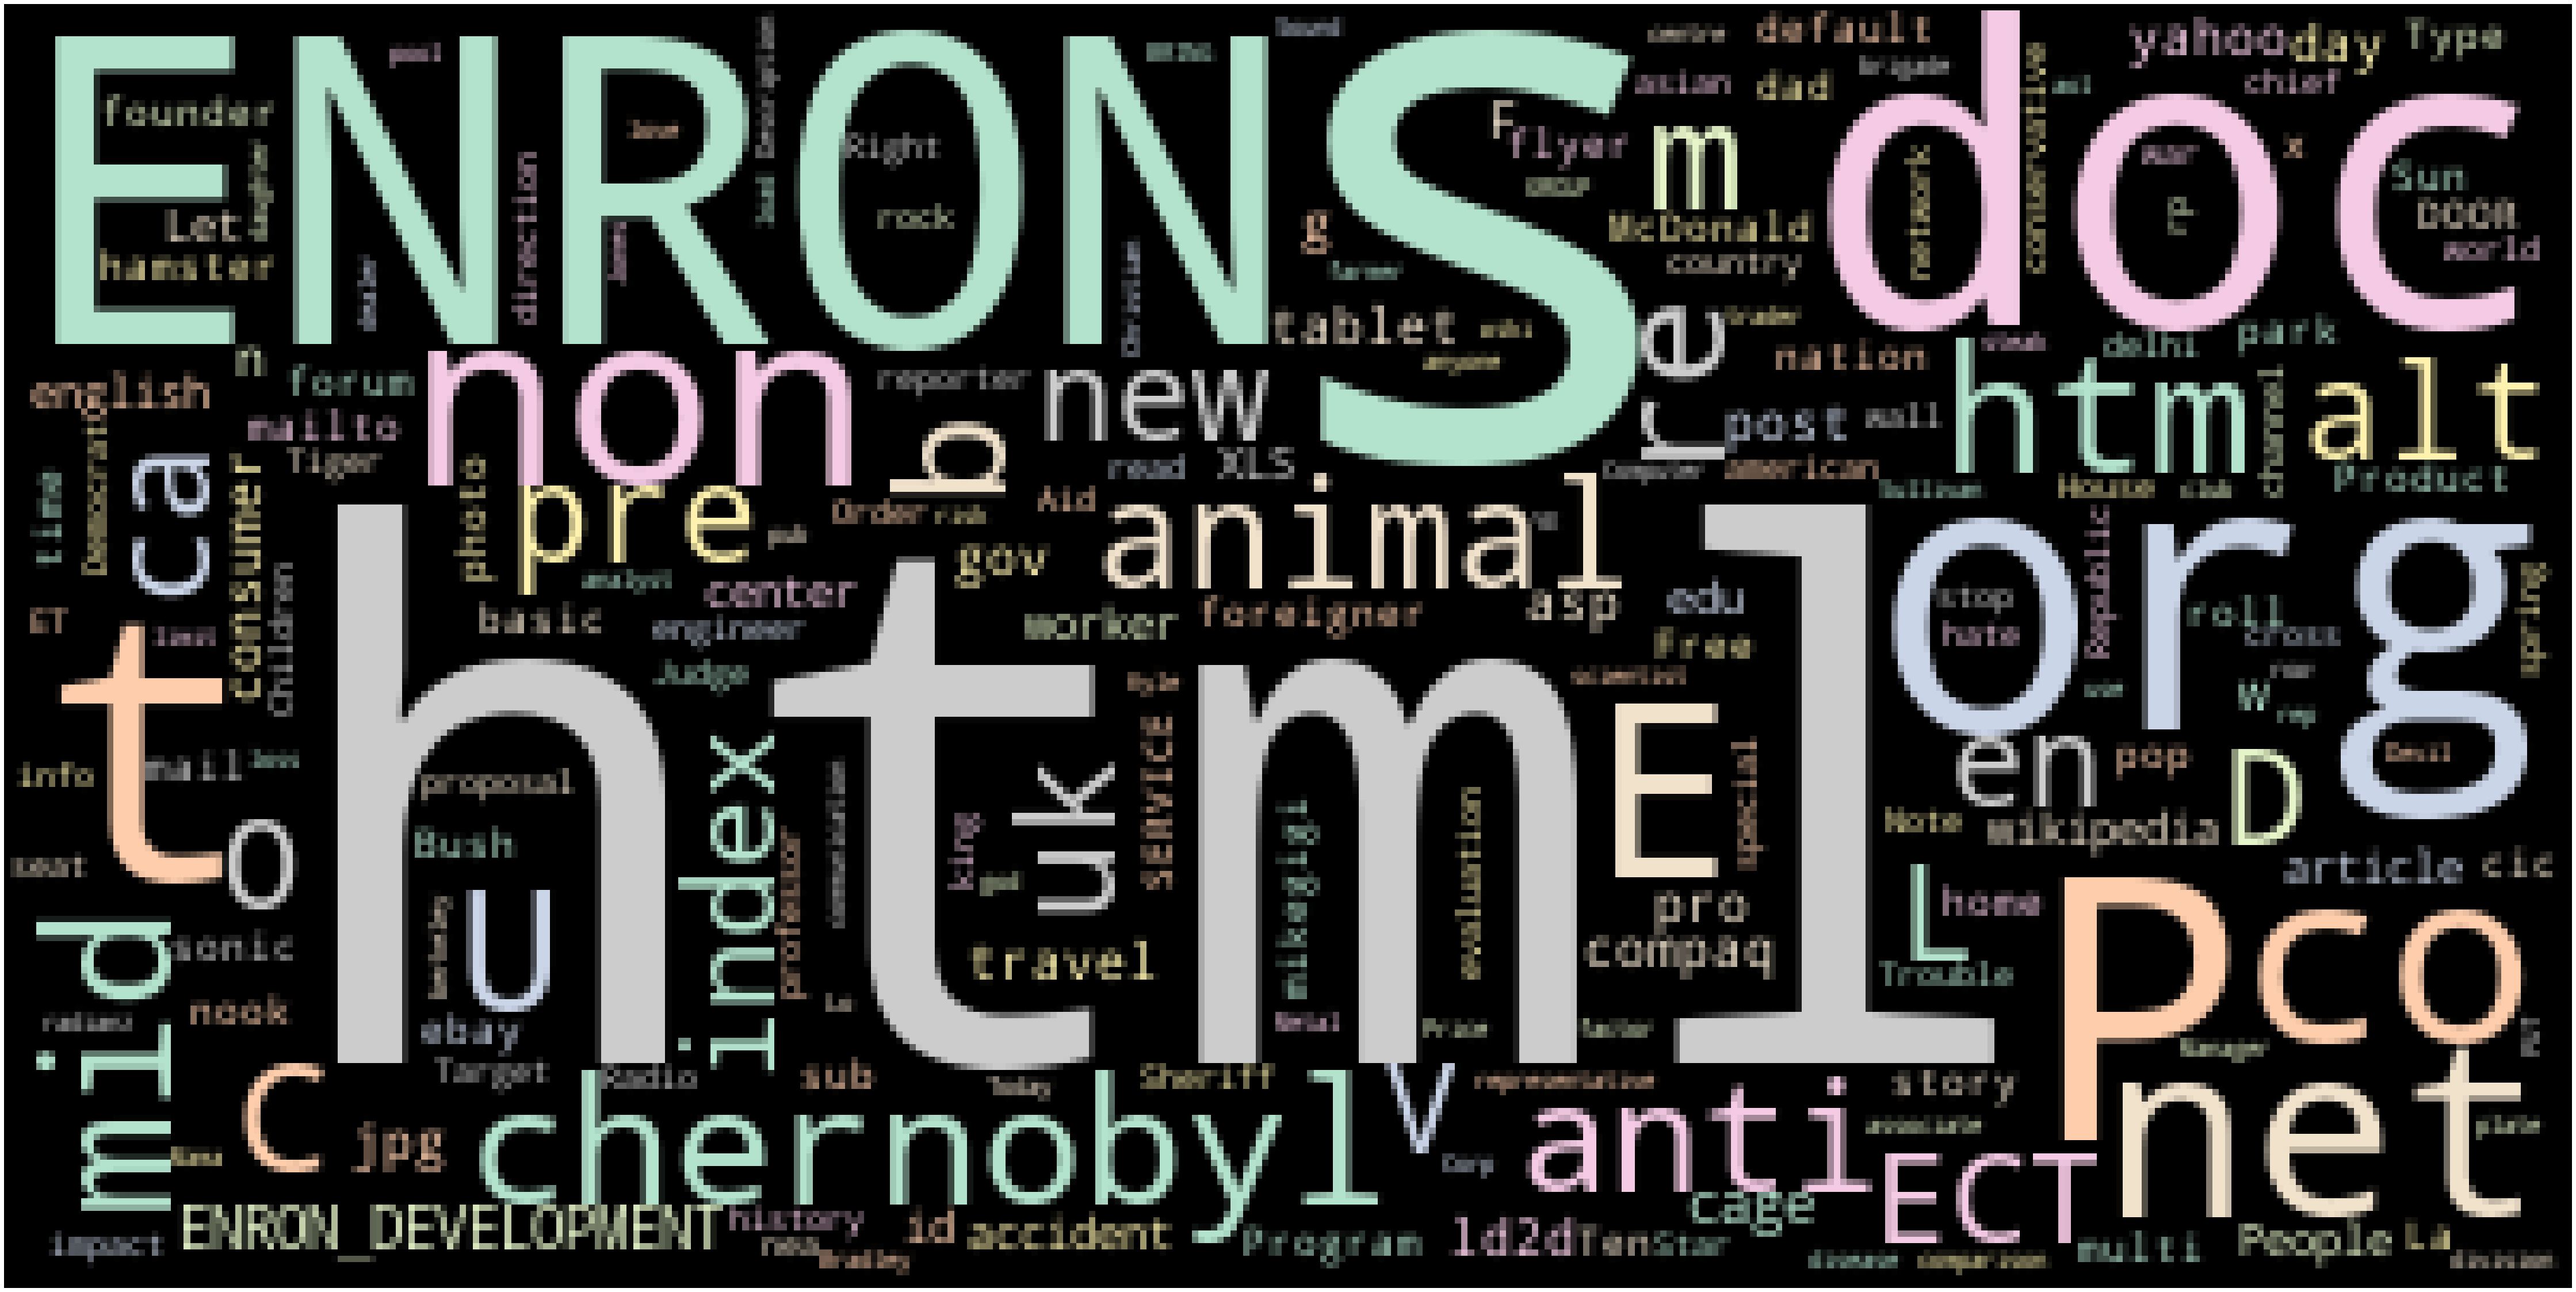

In [10]:
wordcloud = WordCloud(stopwords=STOPWORDS, 
               background_color="Black",
               colormap='Pastel2',
               collocations=False).generate(" ".join(rare_words))

plot_cloud(wordcloud, "word-cloud.pdf") 

## Pie chart with the POS distribution

Storing the frequency of the POS tags in a variable


In [11]:
pos_freqs = FreqDist([pos for (word, pos) in corpus.tagged_words()])

A function to create pie charts

In [12]:
def pie_chart(labels, sizes, file_name):
    """
    Create a pie chart with the labels and their respective proportions.

    Parameters
    ----------
    labels : list
        A list of labels.
    sizes : list
        The size of each label (will be turned into proportions).
    file_path : str
        Name of the file to save the plot.

    Returns
    -------
    None.
    """
    
    fig = plt.figure(figsize=(10, 10))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.savefig(file_name)
    plt.show()  

Plotting the distribution of POS tags

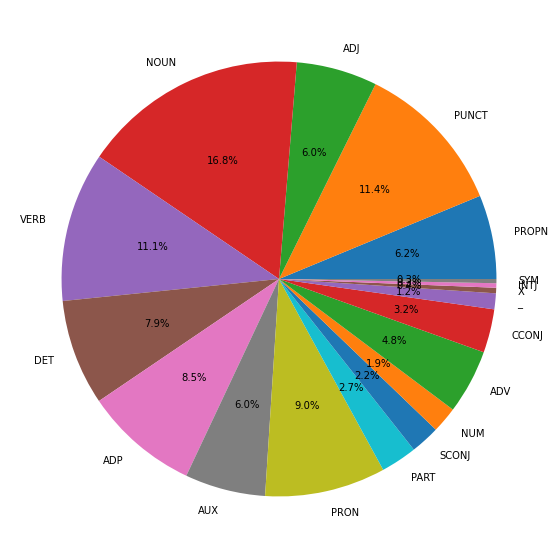

In [13]:
posfreq = corpus.tagged_words()
x = list(pos_freqs.keys())
y = list(pos_freqs.values())

pie_chart(x, y, 'pie_chart.pdf')

## Histogram with the distribution of sentence lengths

Storing the sentence lengths


In [16]:
sent_lens = [len(s) for s in corpus.sents()]
len_freqs = FreqDist(sent_lens)

A function to create histograms:

In [15]:
def histogram(values, file_path):
    """
    Creates a histogram with the length on the y-axis and the frequency
    on the x-axis.

    Parameters
    ----------
    values : list
        A list of values.
    file_path : str
        Name of the file to save the plot.

    Returns
    -------
    None.
    """
    
    plt.hist(values, bins=100)
    plt.xlabel('sentence lenght')
    plt.ylabel('frequency')
    plt.title('Histogram of sentence lenghts')
    plt.savefig(file_path)
    plt.show()

A histogram with the distribution of sentence length

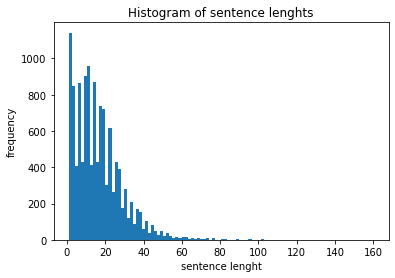

In [17]:
histogram(sent_lens,'sent_len_hist.pdf')

## DataFrame (table)

Storing the corpus size; tagset size; maximum, minimum and mean sentence length in a dictionary


In [18]:
values = {'Corpus Size': [freqs.N()],
   'Tagset Size':[len(pos_freqs)],
   'Max': [max(sent_lens)],
   "Min" : [min(sent_lens)],
   "Mean" : [round(sum(sent_lens)/ len(sent_lens),1)]}

Creating a DataFrame with the dictionary the values

In [19]:
df = pd.DataFrame(values) 
print(df)

   Corpus Size  Tagset Size  Max  Min  Mean
0       207053           18  160    1  16.5


## Conclusions

The corpus analyzed belongs to the Universal Dependencies project. For this analysis, I have only used the train data. The corpus is an extensive one containing 207053 tokens. The longest sentence has 160 tokens while the shortest has only one token. The mean length of the sentences is 16.5 tokens. 

The POS distribution shows 18 different parts of speech. From it, we can notice that the biggest 3 percentages are held by nouns, verbs and puncuations which are the elements of simple sentences. From the sentence length distribution, we can further confirm that the majority of the sentences are short, simple ones as the highest frequencies are for sentences that contain less than 20 words. 

The most frequent words are "would", "one", "like", "time" and "get" appearing between 300-600 times in the sentences. The words that appear most infrequently seem to be file extensions, links and some proper names(companies and persons), but also some common nouns like "cage", "animal" and "consumer". The majority of the most frequent words seem to be common words in the language, with a few exceptions of proper names. Words like "Bush", "US", "Iraq" and "Iran" have a high frequency in the corpus which show that a part of the corpus might concern the US ex-president's, Bush, foreign policies. 